# Problem Set 2 IO

# Question 2
First, we set up the model by declaring parameters, variables and functions. Then, we run regressions and discussed results.

The specification is 
$$\log (\text{Herfindahl}) = \alpha + \beta \log (\text{Lerner}) + \epsilon$$

And the hypothesis testing $H_0$ is $\beta = 1$

## Setting up the model 2 a) b)

In [507]:
rm(list=ls())

setwd("P:/PHD/Courses/02 - Second Year/ECON 761 (IO)/Problem Sets")

set.seed(3)

In [508]:
##### Parameters 

#demand
c0 = 1
c1 = 0.9
xi = 0
#costs
f = 1
b0 = 1
b1 = 0
eta = 0

# others
number_cities = 1000
n =  ceiling(10*runif(number_cities))
#first 500 collude if number firsms smaller than 8
cutoff = number_cities/2
collusion = as.numeric(c((n[1:cutoff]<=8), rep(FALSE, cutoff)))  
# division city types



In [509]:
# Definitions

#equil lerner index for N cournot
lerner_cn = c1/n
#herfindahl for symmetric firms 
herf = 1/n
# equilibrium index for monopoly 
elasticity = rep(1/c1 , number_cities)
# equilibrium index for monopoly
lerner_m = c1
# lerner index depends on conduct
lerner = collusion*lerner_m+ (1-collusion)*lerner_cn
# lerner log 
lerner_log = log(lerner)+0.1*(runif(number_cities)-0.5)
# log herfindahl
log_herf = log(herf)

In [510]:
# Functions

lerner_func = function(p, mc){
  return (p-mc)/p
}

herf_func = function(q,q_tot){
  share_i = q/q_tot
  return (sum(share_i^2))
}

In [511]:
# Creating data set
data = data.frame(lerner_log, log_herf, collusion)

### Regressions

In [512]:
coll_reg = lm(lerner_log~log_herf, data=data[1:cutoff,])
courn_reg = lm(lerner_log~log_herf, data=data[cutoff+1:1000,])
full_reg = lm(lerner_log~log_herf, data=data)

## Question 2 c)

Below are the tables corresponding to the regression of the Lerner Index on the Herfindahl Index for the case of a linear demand and fixed market function for each case **(Antitrust, No Antitrust, Whole Sample).** 

In [513]:
#Hypothesis testing
#Collusion
sum_col =  summary(coll_reg )$coefficients
t_col  = abs(sum_col [2,1]-1)/sum_col [2,2]
reject_col = (t_col>=qnorm(0.95))
sum_col

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.5538758,0.08440148,6.562394,1.330884e-10
log_herf,0.7512105,0.05057847,14.852379,1.423744e-41


We find that on the sample of cities **without antitrust** that collude, an increase of 100 \% in the Herfindahl index increases the Lerner index by 68 \%, and the results are significant. As competition decreases (more Herfindahl, thus more concentration), markups increase less than proportionally.  Out t-test for the hypothesis that the coefficient of the herfindahl $\beta$ is equal to 1, give us the followind result statistic

In [514]:
print(t_col)
reject_col

[1] 4.918881


[1] TRUE

So, we reject the null hypothesis, meaning that under collusion the relationship between the Lernex Index and the Herfindahl Index is less than proportional.

In the case **with antitrust**, we find that an increase of 100 \% in the Herfindahl index increases the Lerner index by 99.9 \%, and the results are significant. This results suggest that as competition decreases (more concentration), we have increase markups proportionally.   

Out t-test for the hypothesis that the coefficient of the Herfindahl -$\beta$- is equal to 1, give us the following result statistic

In [515]:
#Cournot
sum_cou = summary(courn_reg)$coefficients
t_cour = abs(sum_cou[2,1]-1)/sum_cou[2,2]
reject_cou = (t_cour>=qnorm(0.95))
sum_cou

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.1023314,0.003135829,-32.63295,9.049242e-126
log_herf,1.0008733,0.001867018,536.08119,0.000000e+00


Comparing Cournot with collusion, we can see that the positive effect on markups is higher in Cournot, this is because competition actually intensifies the effect on markups, wheras with collusion, this effect is limited. More concentration still yields more markups, but the impact is tampered by less competition. 

In [516]:
print(t_cour)
reject_cou

[1] 0.4677326


[1] FALSE

So, we do **not** reject the null hypothesis ($\beta=1$), meaning that under Cournot competition the relationship between the Lernex Index and the Herfindahl Index is proportional and in the same direction.

In the **whole sample (pool)** , an increase of 100 \% in the Herfindahl index increases the Lerner index by 84\%, and the results are significant. Out t-test for the hypothesis that the coefficient of the herfindahl $\beta$ is equal to 1, give us the followind result statistic

In [517]:
# All cities
sum_full = summary(full_reg)$coefficients
t_full = abs(sum_full[2,1]-1)/sum_full[2,2]
rejectall = (t_full>=qnorm(0.95))
sum_full

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.2339360,0.05824884,4.016148,6.359424e-05
log_herf,0.8816055,0.03479274,25.338781,9.061150e-110


In [518]:
print(t_full)
rejectall

[1] 3.402851


[1] TRUE

So, we **reject** the null hypothesis, meaning that in the whole sample (Cournot and collusion) the relationship between the Lerner Index and the Herfindahl Index is not proportional, because of the weight that the collusion cases have on the sample. However, the effect is smaller than Cournot and larger than with collusion, as the intuition indicates. 


See that the price elasticity of demand is 1.1, i.e. demand is elastic, and despite this, firms can have higher profits. This is related to an exogenous number of firms, there are no potential entrants. 

## Question 2 d)

## Question 2 d)

First we simulate for the 1000 cities, and finds equilibria according to the case.

In [519]:
# More constants
a0 = 3
a1 = 1
v = 0

lerner = NULL 
herf = NULL
elasticity = NULL


In [520]:
# Functions
find_equilibria_ex <- function() {
    
    lerner <<- NULL 
    herf <<- NULL
    elasticity <<- NULL
    
    for(i in 1:number_cities){

        if(collusion[i]==T){

            Q = (a0+v-b0-eta)/(2*a1)
            q = Q/n[i]
            q = rep(q, n[i])
            p = (a0 + v + b0 + eta)/2

            lerner[i] <<- lerner_func(p=p, mc= b0 +eta)
            herf[i] <<- herf_func(q = q,  q_tot = Q)
            elasticity <<- rbind( elasticity,(1/a1)*((a0-a1*Q+v)/Q)) #same elasticity formula than cournot
      } else {

            q = (a0+v-b0-eta)/(a1*(n[i]+1))
            Q = n[i]*q
            q = rep(q, n[i])
            p = (a0+v+n[i]*(b0+eta))/(n[i]+1)

            lerner[i] <<- lerner_func(p =p , mc = b0 + eta)
            herf[i] <<- herf_func(q = q, q_tot = Q)
            elasticity <<- rbind(elasticity,abs((-1/a1)*((a0-a1*Q+v)/Q)))
      }
    }
    
}

In [521]:
find_equilibria_ex()

In [522]:
# Regression vars
lerner_log = log(lerner) + runif(number_cities,-0.05, 0.05)
herf_log = log(herf)
data = data.frame(lerner_log, herf_log)

#Regressions
coll_reg_d = lm(lerner_log~herf_log, data=data[1:cutoff,])
courn_reg_d = lm(lerner_log~herf_log, data=data[cutoff+1:number_cities,])
full_reg_d = lm(lerner_log~herf_log, data=data)

We obtain different results, for this set of simulations. Below we show tables with results of the regression of the Lerner index on Herfindahl index for a linear demand and exogenous market structure, for each case: **Antitrust, No Antitrust, Whole Sample.**. 

We find that on the sample of cities **without antitrust** that collude, an increase of 100 \% in the Herfindahl index increases the Lerner index by 55 \%, and the results are significant. With these parameters, we get an even smaller result than before. As competition decreases (more Herfindahl, thus more concentration), markups increase less than proportionally.  Out t-test for the hypothesis that the coefficient of the Herfindahl $\beta$ is equal to 1, give us the following result statistic


In [523]:
#Collusion
sum_col =  summary(coll_reg_d)$coefficients
t_col=abs(sum_col [2,1]-1)/sum_col [2,2]
reject_col=(t_col>=qnorm(0.95))
sum_col

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.4861460,0.06210369,7.827974,3.002188e-14
herf_log,0.5527455,0.03721628,14.852249,1.425663e-41


In [524]:
print(t_col)
reject_col

[1] 12.01771


[1] TRUE

So, we **reject** the null hypothesis, meaning that under collusion the relationship between the Lerner Index and the Herfindahl Index is less than proportional.

In the case **with antitrust**, we find that an increase of 100 \% in the Herfindahl index increases the Lerner index by 75.2 \%, and the results are significant. These results suggest that as competition decreases (more concentration), we have increase markups proportionally.   

Out t-test for the hypothesis that the coefficient of the Herfindahl -$\beta$- is equal to 1, give us the following result statistic

In [525]:
#Cournot
sum_cou = summary(courn_reg_d)$coefficients
t_cour = abs(sum_cou[2,1]-1)/sum_cou[2,2]
reject_cou = (t_cour>=qnorm(0.95))
sum_cou

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.08661314,0.005542366,15.62747,4.370602e-45
herf_log,0.75636883,0.003299828,229.21463,0.000000e+00


In [526]:
print(t_cour)
reject_cou

[1] 73.83148


[1] TRUE

So, we **reject** the null hypothesis, meaning that in this case, under Cournot competition the relationship between the Lerner Index and the Herfindahl Index is not proportional. This is different from c), and indicates that depending on the demand curve, we might or not be able to easily detect collusion

Using the  **whole pool**, we find that an increase of 100 \% in the Herfindahl index increases the Lerner index by 65\%, and the results are significant. This effect is smaller than in d) and it is between the collusion sample and the Cournot sample results, which is what we would expect.  Out t-test for the hypothesis that the coefficient of the Herfindahl $\beta$ is equal to 1, give us the following result statistic

In [527]:
# All cities
sum_full = summary(full_reg_d)$coefficients
t_full = abs(sum_full[2,1]-1)/sum_full[2,2]
rejectall = (t_full>=qnorm(0.95))
sum_full

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.2924632,0.04163133,7.025073,3.955986e-12
herf_log,0.6587182,0.02486690,26.489765,1.596474e-117


In [484]:
print(t_full)
rejectall

[1] 14.1418


[1] TRUE

Likewise, we reject the null hypothesis. 

## Question 2 e)

We learned that if we suspect collusion in a set of markets, we can regress the Lerner index on the Herfindahl index, and test for the null hypothesis $\beta=1$. If we reject the hypothesis, we might have collusion in those markets.

We also learn that the functional form of the demand matters on the impact of collusion in markets. Firms have different abilities to exert market power and thus have higher markups when colluding. Depending on how the elasticity varies along the demand curve, collusion and Competition have a different effect on markups. With constant elasticity, firms face similar constraints along the demand curve, while with varying elasticity, the more elastic parts yield smaller markups.

# Question 3

We need to modify the simulation to calculate exogenously the market structure and to only play Cournot.

In [485]:
# Setting params
a0 = 5

In [486]:
# Exogenous number of cities
n_endog <- function(){
    n <<-NULL
    for(i in 1:number_cities){
        n <<- rbind(n,((a0+v[i]-b0-eta[i])/sqrt(a1*f))-1)
    }
}


# Simulation
find_equilibria_end <- function() {

    lerner <<- NULL 
    herf <<- NULL
    elasticity <<- NULL

    for(i in 1:number_cities){
        q = (a0+v-b0-eta[i])/(a1*(n[i]+1))
        Q = n[i]*q
        q = rep(q, n[i])
        p = (a0+v[i]+n[i]*(b0+eta[i]))/(n[i]+1)
        
# using endogenous formulas
        lerner[i] <<- (sqrt(a1*f)/(sqrt(a1*f)+b0+eta[i]))
        herf[i] <<- (sqrt(a1*f)/(a0+v[i]-b0-eta[i]- sqrt(a1*f)) )
        elasticity[i] <<- ((sqrt(a1*f)+b0+eta[i])/(a0+v[i]-b0-eta[i]-sqrt(a1*f)))
    }

}


## Question 3 a)

Case where $v$ is distributed $U[-1,1]$ and $\eta=0$: **variation in the willingness to pay**.

In [487]:

# case eta = 0, v in [-1,1]
eta =  rep (0,number_cities)
v = runif(number_cities,-1,1)

# number of cities
n_endog()

find_equilibria_end()

lerner_log = log(lerner) + runif(number_cities,-0.05, 0.05)
herf_log = log(herf)
data = data.frame(lerner_log, herf_log)
elast_3a <- elasticity

#Regressions
full_reg_3a = lm(lerner_log~herf_log, data=data)

In [488]:
# All cities regression
summary(full_reg_3a)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.697566454,0.005029198,-138.703312,0.0000000
herf_log,-0.003039956,0.004598978,-0.661007,0.5087604


The previous table shows the regression of the Lerner Index on the Herfindahl index for the case of **endogenous number of firms**, $v\sim U[-1,1]$ and $\eta=0$. 

## Question 3 b)

Case where $\eta$ is distributed $U[-1,1]$ and $v=0$: **variation in firms marginal cost**.

In [443]:
# case v = 0, eta in [-1,1]
v =  rep (0,number_cities)
eta = runif(number_cities,-1,1)

# number of cities
n_endog()

find_equilibria_end()

lerner_log = log(lerner) + runif(number_cities,-0.05, 0.05)
herf_log = log(herf)
data = data.frame(lerner_log, herf_log)
elast_3b <- elasticity

#Regressions
full_reg_3b = lm(lerner_log~herf_log, data=data)


In [444]:
# All cities regression
#library(stargazer)
summary(full_reg_3b)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-2.309528,0.01340157,-172.3327,0
herf_log,-1.538601,0.01213797,-126.7593,0


The previous table shows the regression of the Lerner Index on the Herfindahl index for the case of **endogenous number of firms**, $\eta \sim U[-1,1]$ and $v=0$. 

## 3 c)
When there is variation in consumers' willingness to pay, we estimate that the effect on markups is very small and positive, $\beta = 0.004$ However this coefficient is not significant, the absolute value of the $t$ value is smaller than 2, which indicates a high p-value This is a very small effect, which can be explained by the difficulty of identifying a pattern do to variations. If we compare this result with what we found in question 2, which was a positive and large effect on markups for every case. 

Uncertainty in marginal cost across cities results also in a small but negative coefficient, $\beta=-1.5$, but this time we get a large and significant coefficient. The interpretation of this coefficient is that more concentration in the industry brings markups down. The optimal endogenous number of firms is 2 and 4, and the elasticities in the case where $\eta=0$ are less sparse (ranging from 0.4 to 1) than when $v=0$ (ranging from 0.2 to 1.5). Moreover, as expected, markets with fewer firms that are more concentrated have higher elasticities. In particular, the only markets where firms face elastic demands are those markets where firms have higher marginal costs, and thus there are fewer firms. So, the existence of a high number of markets where demand is elastic ($\epsilon >1$), helps explain why the ability to set higher markups is limited when $v=0$. The demand is more responsive, so when there is variation in the marginal costs, this shifts the equilibrium to a more elastic part of the demand, decreasing quantities whenever there is less competition. The fact that this happens in some markets in b) and in zero markets in a) helps to explain the difference in effects. 

# Note

*Table results might be slightly different to coefficients in text, because every simulation is generated from a distribution, so every regression gives slightly different results.* 

# Appendix

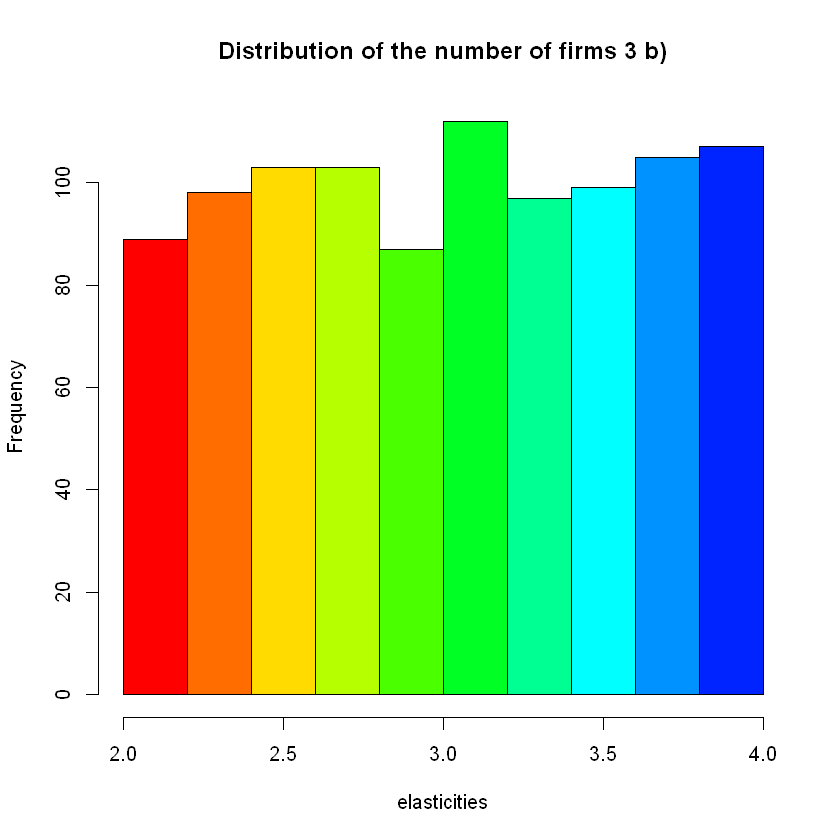

In [450]:
hist(n, main= "Distribution of the number of firms 3 b)",xlab = "elasticities",col=rainbow(14))

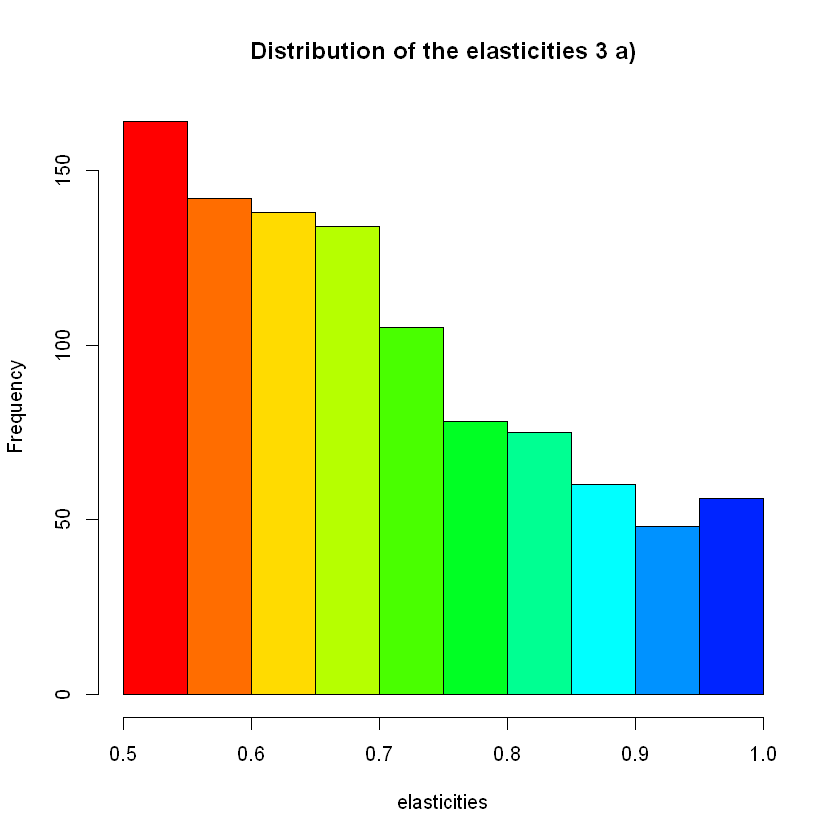

In [451]:
hist(elast_3a, main= "Distribution of the elasticities 3 a)" ,xlab = "elasticities",col=rainbow(14))

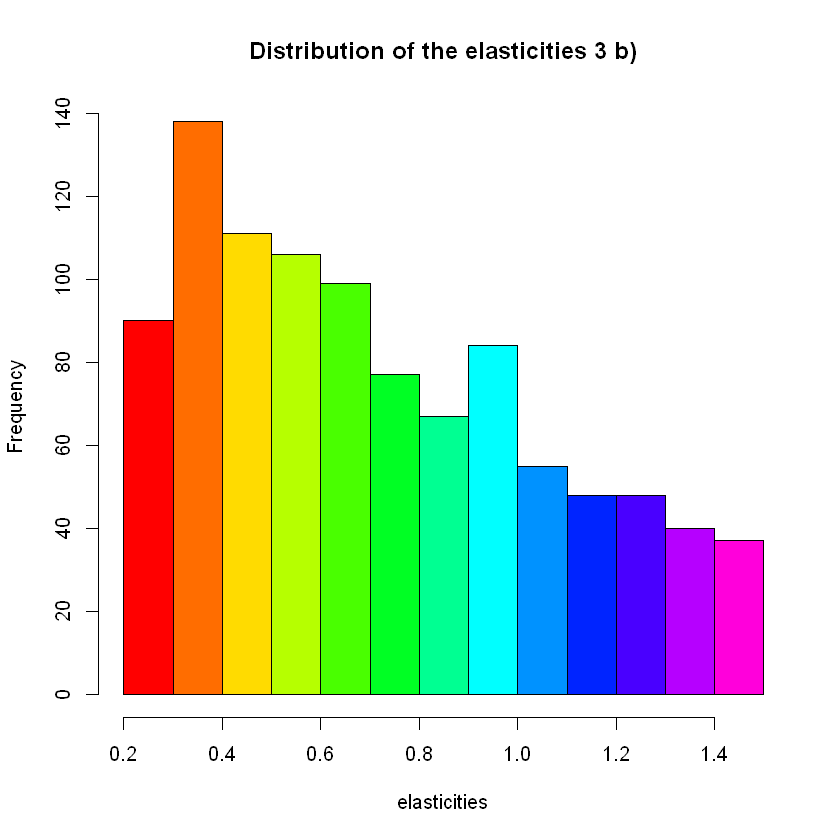

In [452]:
hist(elast_3b, main= "Distribution of the elasticities 3 b)",xlab = "elasticities", col=rainbow(14))